In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Salma\Downloads\cereal.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
df.shape

(77, 16)

# Data Cleaning

##### Finding Missing Values

In [5]:
df.isna().sum()#There are no missing values in this data set

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

##### Finding Duplicates

In [6]:
df.duplicated().sum()#There are no duplicates in this data set

0

In [7]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [8]:
q1=df['calories'].quantile(0.25)
q3=df['calories'].quantile(0.75)
IQR=q3-q1
lower=q1-(1.5*IQR)
print(lower)
upper=q3+(1.5*IQR)
print(upper)

85.0
125.0


In [9]:
con=(df['calories']<lower) | (df['calories']>upper)
con

0      True
1     False
2      True
3      True
4     False
      ...  
72    False
73    False
74    False
75    False
76    False
Name: calories, Length: 77, dtype: bool

<Axes: xlabel='calories'>

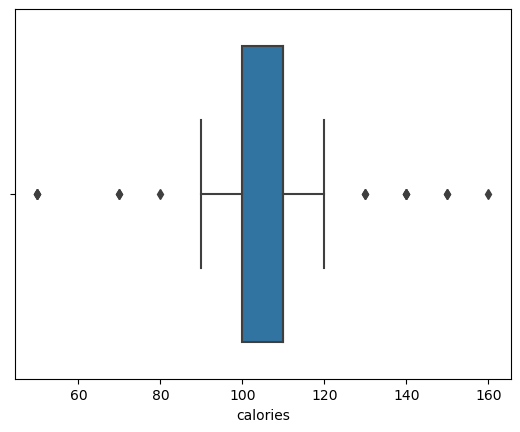

In [10]:
sns.boxplot(data = df,x = 'calories')

In [11]:
condition1=(df['calories']<80) | (df['calories']>120)
condition1

0      True
1     False
2      True
3      True
4     False
      ...  
72    False
73    False
74    False
75    False
76    False
Name: calories, Length: 77, dtype: bool

In [12]:
median_calories = df['calories'].median()
median_calories

110.0

In [13]:
df['calories'] = np.where(condition1,median_calories,df['calories'])
df['calories']

0     110.0
1     120.0
2     110.0
3     110.0
4     110.0
      ...  
72    110.0
73    110.0
74    100.0
75    100.0
76    110.0
Name: calories, Length: 77, dtype: float64

In [14]:
# Identify outliers based on the condition
condition1 = (df['calories'] < 80) | (df['calories'] > 120)

# Calculate the median of the non-outlier values in the 'calories' column
median_calories = df.loc[~condition1, 'calories'].median()

# Replace outliers with the median of the non-outlier values
df['calories'] = np.where(condition1, median_calories, df['calories'])
#changing the data type of calories column into int
df['calories']=df['calories'].astype('int')
df['calories']

0     110
1     120
2     110
3     110
4     110
     ... 
72    110
73    110
74    100
75    100
76    110
Name: calories, Length: 77, dtype: int32

In [15]:
condition1 = (df['calories'] < 80) | (df['calories'] > 120)
condition1.sum()

0

In [16]:
df.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,110,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,110,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


<Axes: xlabel='protein'>

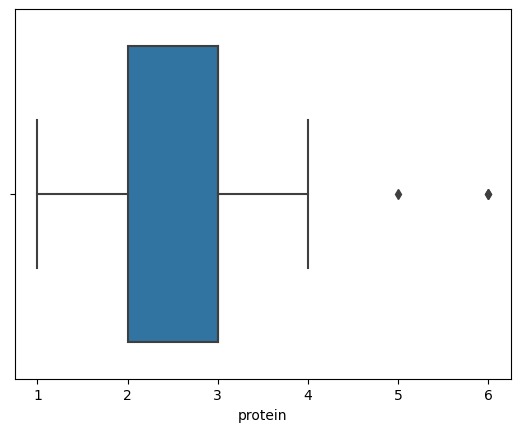

In [17]:
#Finding the outliers in protein column
sns.boxplot(data = df,x = 'protein')

In [18]:
condition2=df[(df['protein']<1) | (df['protein']>4)]
condition2

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392
67,Special K,K,C,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324


In [19]:
# Identify outliers based on the condition
condition2=(df['protein']<1) | (df['protein']>4)
# Calculate the median of the non-outlier values in the 'protein' column
median_protein = df.loc[~condition2, 'protein'].median()
# Replace outliers with the median of the non-outlier values
df['protein'] = np.where(condition2, median_protein, df['protein'])

# Print the DataFrame to check the changes 
df['protein']

0     4.0
1     3.0
2     4.0
3     4.0
4     2.0
     ... 
72    2.0
73    1.0
74    3.0
75    3.0
76    2.0
Name: protein, Length: 77, dtype: float64

In [20]:
condition2=df[(df['protein']<1) | (df['protein']>4)]
condition2

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [21]:
#
df.dtypes

name         object
mfr          object
type         object
calories      int32
protein     float64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

<Axes: xlabel='fat'>

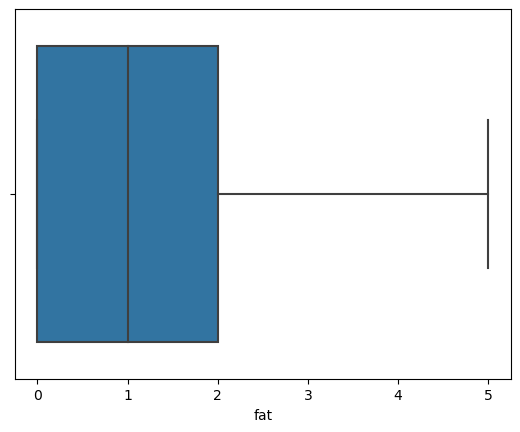

In [22]:
#Finding the outliers in fat column
sns.boxplot(data = df,x = 'fat')

In [23]:
q1=df['fat'].quantile(0.25)
q3=df['fat'].quantile(0.75)
IQR=q3-q1
lower=q1-(1.5*IQR)
print(lower)
upper=q3+(1.5*IQR)
print(upper)

-3.0
5.0


<Axes: xlabel='sodium'>

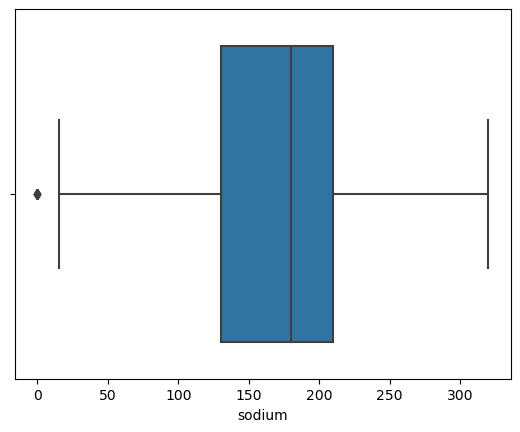

In [24]:
##Finding the outliers in fat column
sns.boxplot(data = df,x = 'sodium')

In [25]:
df.dtypes

name         object
mfr          object
type         object
calories      int32
protein     float64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [26]:
q1=df['sodium'].quantile(0.25)
q3=df['sodium'].quantile(0.75)
IQR=q3-q1
lower=q1-(1.5*IQR)
print(lower)
upper=q3+(1.5*IQR)
print(upper)

10.0
330.0


In [27]:
condition3=(df['sodium']<1) | (df['sodium']>300)
condition3.sum()

10

In [28]:
df['sodium'].median()

180.0

In [29]:
df['sodium'] = np.where(condition3, np.nan, df['sodium'])

In [30]:
med=df['sodium'].median()

In [31]:
df['sodium'].fillna(med,inplace = True)

<Axes: xlabel='sodium'>

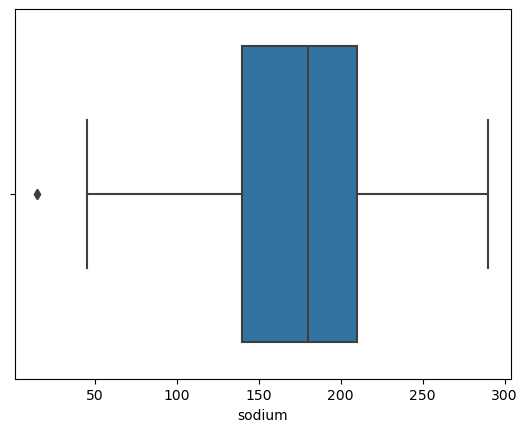

In [32]:
sns.boxplot(data = df,x = 'sodium')

In [33]:
condition3=(df['sodium']<1) | (df['sodium']>300)
condition3.sum()

0

<Axes: xlabel='fiber'>

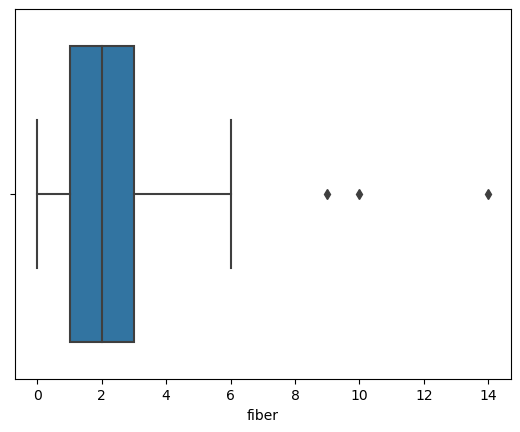

In [34]:
sns.boxplot(data = df,x = 'fiber')

In [35]:
condition_fiber=(df['fiber']<0) | (df['fiber']>6)
condition_fiber.sum()

3

In [36]:
df['fiber'] = np.where(condition_fiber, np.nan, df['fiber'])

In [37]:
med_fiber=df['fiber'].median()

In [38]:
df['fiber'].fillna(med_fiber,inplace = True)

In [39]:
condition_fiber=(df['fiber']<0) | (df['fiber']>6)
condition_fiber.sum()

0

In [40]:
df.dtypes

name         object
mfr          object
type         object
calories      int32
protein     float64
fat           int64
sodium      float64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

<Axes: xlabel='carbo'>

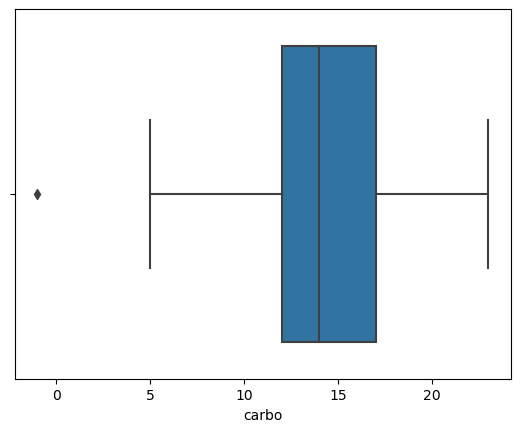

In [41]:
sns.boxplot(data = df,x = 'carbo')

In [42]:
condition_carbo=(df['carbo']<5)
condition_carbo.sum()

1

In [43]:
df['carbo'] = np.where(condition_carbo, np.nan, df['carbo'])

In [44]:
median_carbo=df['carbo'].median()

In [45]:
df['carbo'].fillna(median_carbo,inplace = True)

In [46]:
condition_carbo=(df['carbo']<5)
condition_carbo.sum()

0

<Axes: xlabel='sugars'>

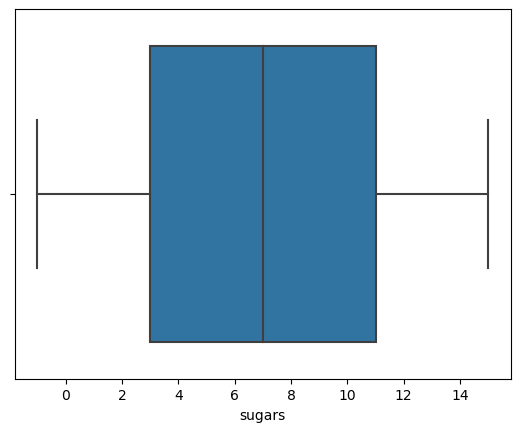

In [47]:
sns.boxplot(data = df,x = 'sugars')#There are no outliers in this sugar column

<Axes: xlabel='potass'>

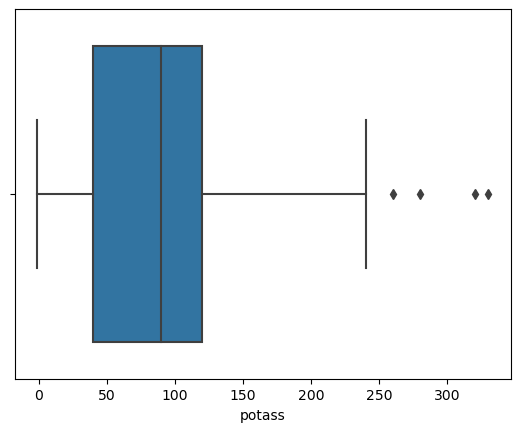

In [48]:
sns.boxplot(data = df,x = 'potass')

In [49]:
print(df['potass'].min())
print(df['potass'].max())

-1
330


In [50]:
condition_potass=(df['potass']<0) | (df['potass']>330)
condition_potass.sum()

2

In [51]:
df['potass'] = np.where(condition_potass, np.nan, df['potass'])
median_potass=df['potass'].median()

In [52]:
df['potass'].fillna(median_potass,inplace = True)

<Axes: xlabel='potass'>

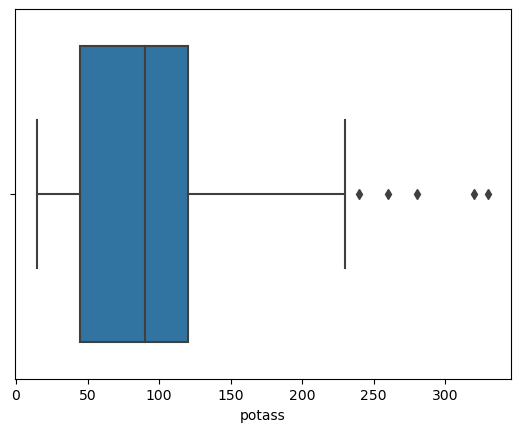

In [53]:
sns.boxplot(data = df,x = 'potass')#As potassium in cereals can't be negative so replacing the negative values with median of non-outlier values and here the in the box plot it is showing outliers but they are not outliers they are real values and we cant say that potassium should be in this range but if there is huge difference is there between max value and remaining values then we would have deleted so we can't take delete these values

<Axes: xlabel='vitamins'>

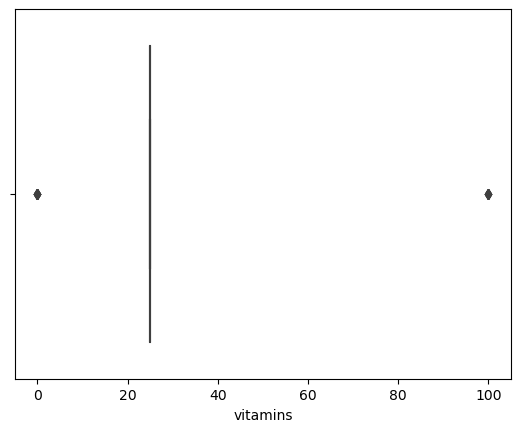

In [54]:
sns.boxplot(data = df,x = 'vitamins')

In [55]:
df['vitamins'].min()
df['vitamins'].max()
condition_vitamins=(df['vitamins']<0) | (df['vitamins']>100)
condition_vitamins.sum()
#There are no outliers in this vitamins column but in the above box plot is showing outliers but they are not outliers beacause if the vitamins values are less than 0 then we can say that there are outliers and there are no such values which are greater than 100 so all the values in vitamin column are real values so they cant be removed

0

<Axes: xlabel='weight'>

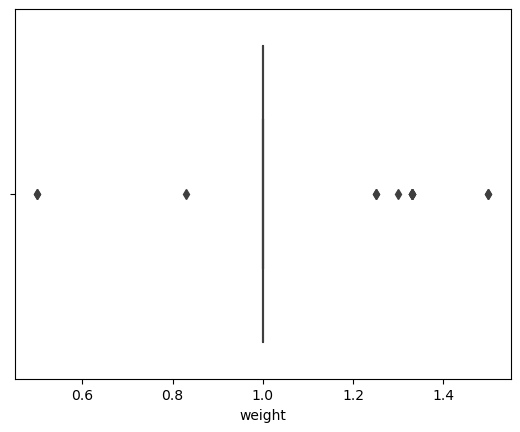

In [56]:
sns.boxplot(data = df,x = 'weight')

In [57]:
df['weight'].min()
df['weight'].max()

1.5

In [58]:
condition_weight=(df['vitamins']<0) | (df['weight']>1.5)
condition_weight.sum()#There are no outlliers in this weight column because weight cant be negative and there is no such value which is less than 0 and the max weight is 1.5 which is common weight that can be taken

0

<Axes: xlabel='cups'>

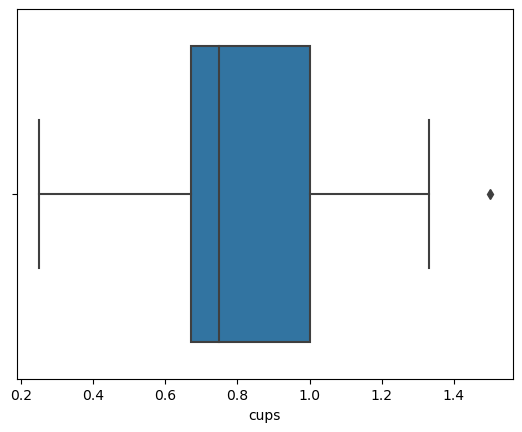

In [59]:
sns.boxplot(data = df,x = 'cups')

In [60]:
minimum=df['cups'].min()
maximum=df['cups'].max()
condition_cups=(df['cups']<minimum) | (df['cups']>maximum)
condition_cups.sum()#There are no outliers in cups column

0

<Axes: xlabel='rating'>

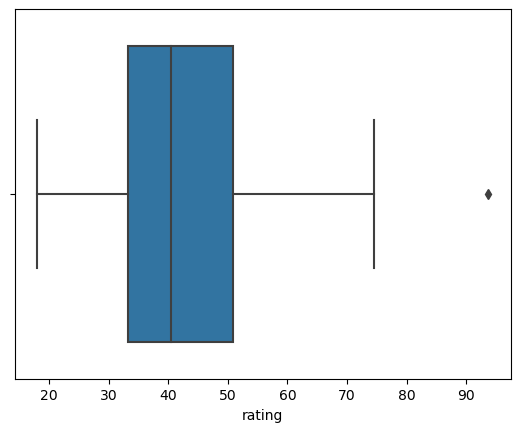

In [61]:
sns.boxplot(data = df,x = 'rating')

In [62]:
a=df['rating'].min()
print(a)
b=df['rating'].max()
print(b)
condition_rating=(df['rating']<a) | (df['rating']>b)
condition_rating.sum()#There are no outliers in this column because D

18.042851
93.704912


0

In [63]:
df.dtypes

name         object
mfr          object
type         object
calories      int32
protein     float64
fat           int64
sodium      float64
fiber       float64
carbo       float64
sugars        int64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

# Data Visualization

In [64]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,110,4.0,1,130.0,1.5,5.0,6,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3.0,5,15.0,2.0,8.0,8,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,110,4.0,1,260.0,1.5,7.0,5,320.0,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,110,4.0,0,140.0,1.5,8.0,0,330.0,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2.0,2,200.0,1.0,14.0,8,90.0,25,3,1.0,0.75,34.384843


In [65]:
df['name'].nunique()

77

In [66]:
df['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [67]:
manufacturer = {'N': 'Nestle', 'Q': 'Quaker', 'K': 'Kellogg', 'R': 'Generic', 'G': 'General Mills', 'P': 'Post', 'A': 'American Home'}
df['mfr'] = df['mfr'].replace(manufacturer)
df['mfr']

0            Nestle
1            Quaker
2           Kellogg
3           Kellogg
4           Generic
          ...      
72    General Mills
73    General Mills
74          Generic
75    General Mills
76    General Mills
Name: mfr, Length: 77, dtype: object

In [68]:
df.dtypes

name         object
mfr          object
type         object
calories      int32
protein     float64
fat           int64
sodium      float64
fiber       float64
carbo       float64
sugars        int64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [71]:
def cereal_type(n):
    if n == 'C':
        return 'Cold'
    else:
        return 'Hot'
df['type'] = df['type'].apply(cereal_type)

In [74]:
df['type'].unique()

array(['Cold', 'Hot'], dtype=object)

In [75]:
df.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nestle,Cold,110,4.0,1,130.0,1.5,5.0,6,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker,Cold,120,3.0,5,15.0,2.0,8.0,8,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,Kellogg,Cold,110,4.0,1,260.0,1.5,7.0,5,320.0,25,3,1.0,0.33,59.425505


In [81]:
#1.categorical Data
pd.crosstab(index = df['name'],columns = df['type'])

type,Cold,Hot
name,,
100% Bran,1,0
100% Natural Bran,1,0
All-Bran,1,0
All-Bran with Extra Fiber,1,0
Almond Delight,1,0
...,...,...
Triples,1,0
Trix,1,0
Wheat Chex,1,0


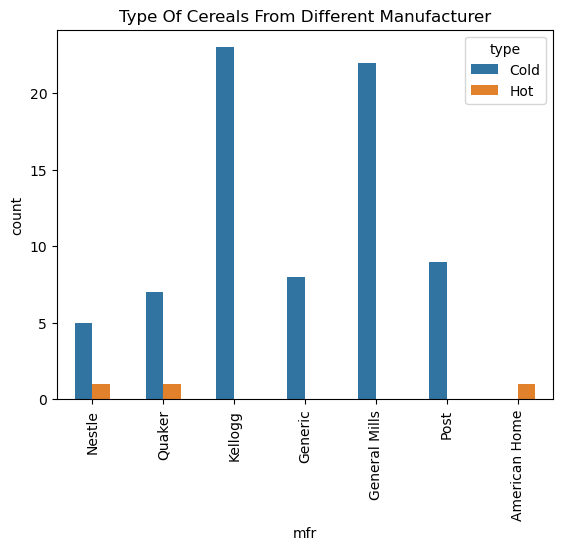

In [84]:
sns.countplot(data = df,x = 'mfr',hue ='type',orient = 'h' ,width=0.5)
plt.title('Type Of Cereals From Different Manufacturer')
plt.xticks(rotation  =90)
plt.show()

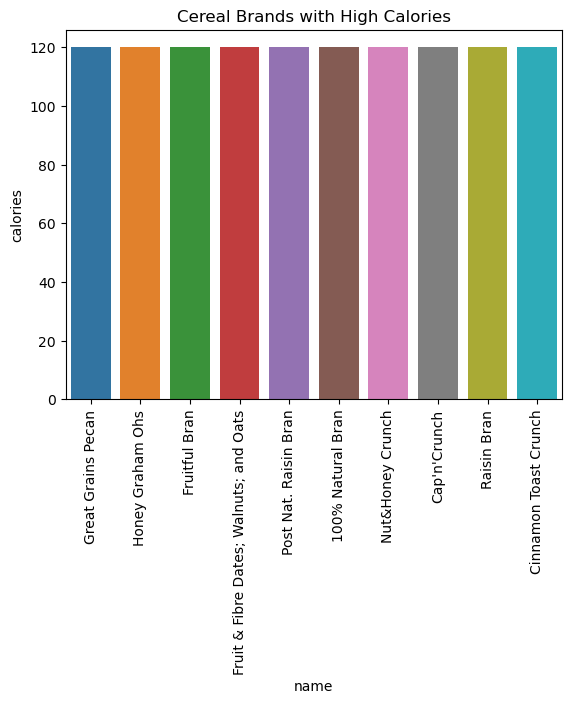

In [96]:
data1 = df.sort_values("calories", ascending=False)
data2 = data1.head(10)

# Plotting
sns.barplot(data=data2, x='name', y='calories')
plt.title('Cereal Brands with High Calories')
plt.xticks(rotation=90)
plt.show()

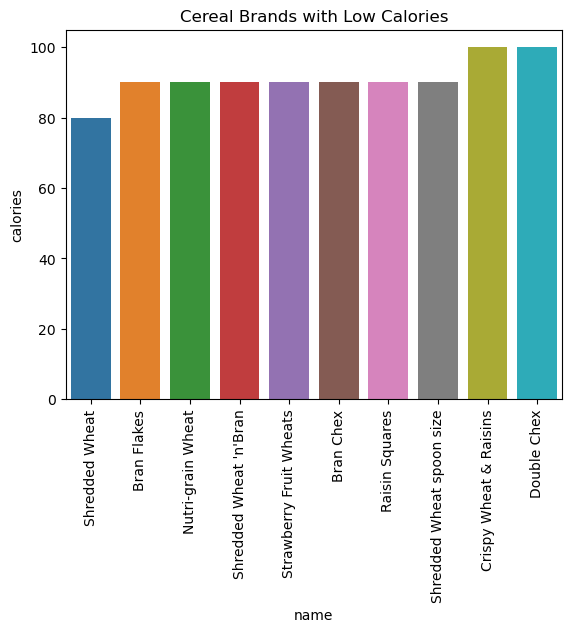

In [94]:
#2.Categerical And Numerical
#1.Bar Chart
# Assuming df is your DataFrame
data1 = df.sort_values("calories", ascending=True)
data2 = data1.head(10)

# Plotting
sns.barplot(data=data2, x='name', y='calories')
plt.title('Cereal Brands with Low Calories')
plt.xticks(rotation=90)
plt.show()

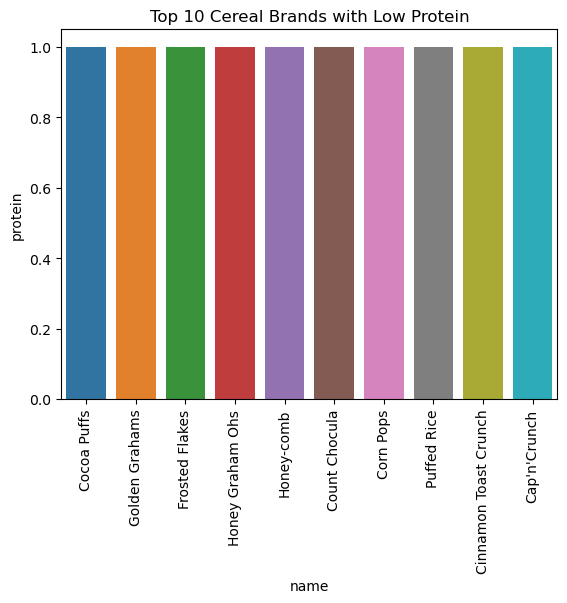

In [100]:
# Assuming df is your DataFrame
data1 = df.sort_values("protein", ascending=True)
data2 = data1.head(10)

# Plotting
sns.barplot(data=data2, x='name', y='protein')
plt.title('Top 10 Cereal Brands with Low Protein')
plt.xticks(rotation=90)
plt.show()

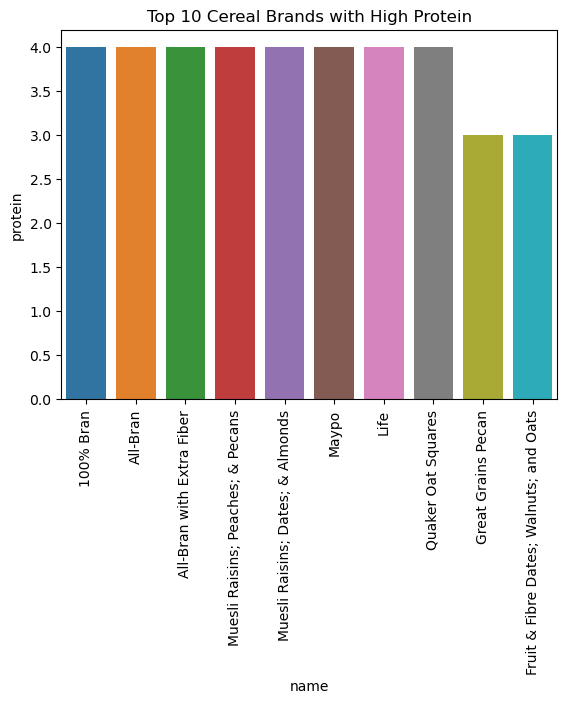

In [101]:
data1 = df.sort_values("protein", ascending=False)
data2 = data1.head(10)

# Plotting
sns.barplot(data=data2, x='name', y='protein')
plt.title('Top 10 Cereal Brands with High Protein')
plt.xticks(rotation=90)
plt.show()

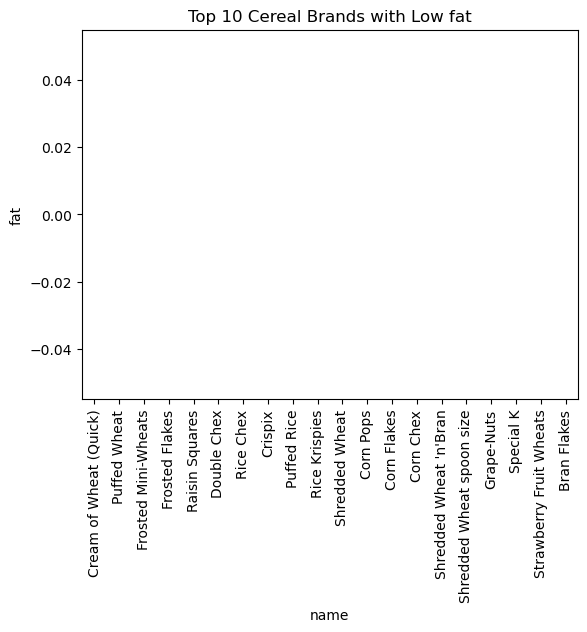

In [112]:
data1 = df.sort_values("fat", ascending=True)
data2 = data1.head(20)
# Plotting
sns.barplot(data=data2, x='name', y='fat')
plt.title('Top 10 Cereal Brands with Low fat')
plt.xticks(rotation=90)
plt.show()

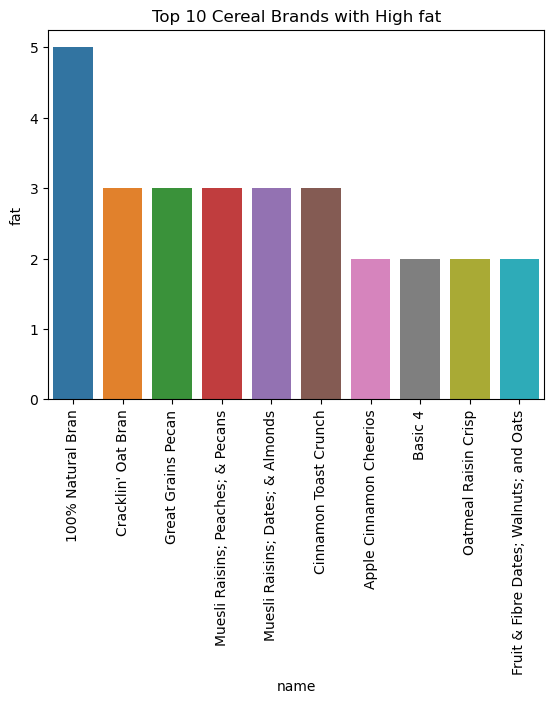

In [103]:
data1 = df.sort_values("fat", ascending=False)
data2 = data1.head(10)

# Plotting
sns.barplot(data=data2, x='name', y='fat')
plt.title('Top 10 Cereal Brands with High fat')
plt.xticks(rotation=90)
plt.show()

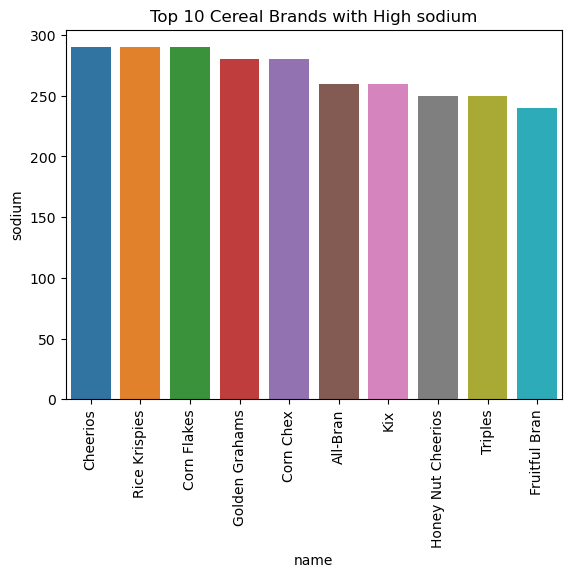

In [114]:
data1 = df.sort_values("sodium", ascending=False)
data2 = data1.head(10)

# Plotting
sns.barplot(data=data2, x='name', y='sodium')
plt.title('Top 10 Cereal Brands with High sodium')
plt.xticks(rotation=90)
plt.show()

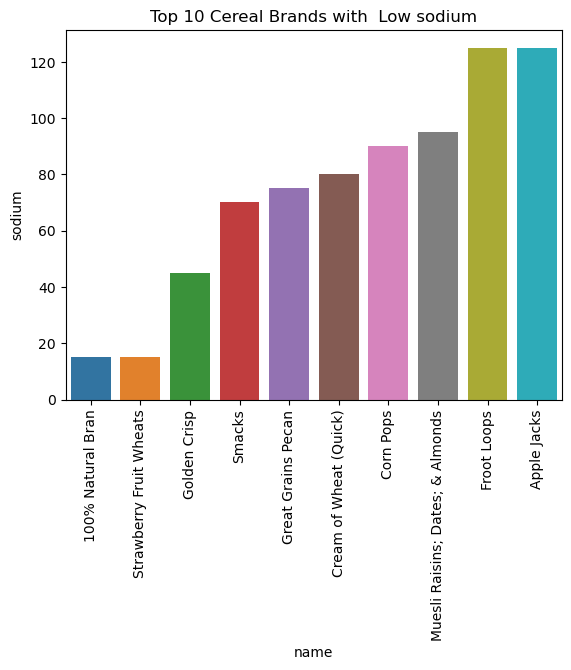

In [115]:
data1 = df.sort_values("sodium", ascending=True)
data2 = data1.head(10)

# Plotting
sns.barplot(data=data2, x='name', y='sodium')
plt.title('Top 10 Cereal Brands with  Low sodium')
plt.xticks(rotation=90)
plt.show()

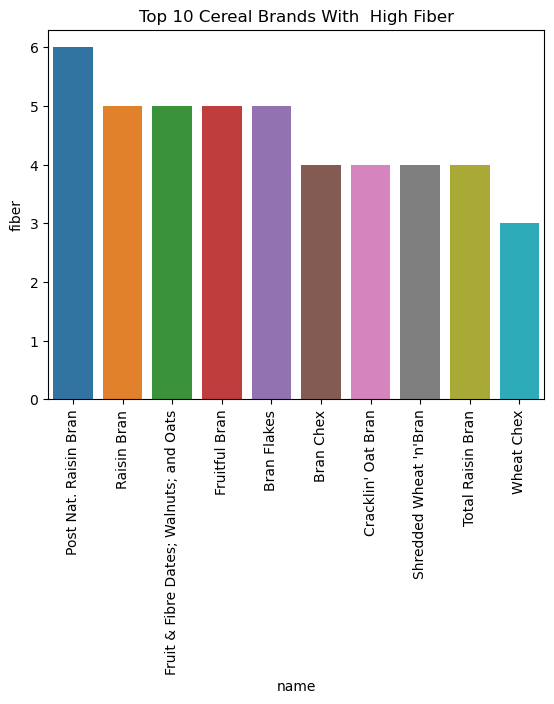

In [137]:
data1 = df.sort_values("fiber", ascending=False)
data2 = data1.head(10)

# Plotting
sns.barplot(data=data2, x='name', y='fiber')
plt.title('Top 10 Cereal Brands With  High Fiber')
plt.xticks(rotation=90)
plt.show()#Outliers in this data set are true values so we should not delete them

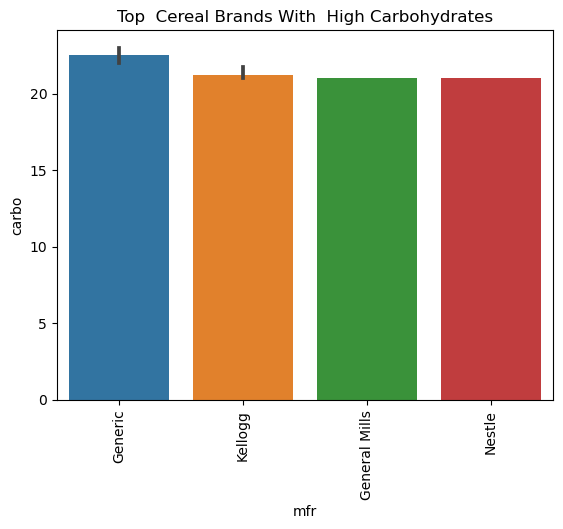

In [141]:
data1 = df.sort_values("carbo", ascending=False)
data2 = data1.head(10)
# Plotting
sns.barplot(data=data2, x='mfr', y='carbo')
plt.title('Top  Cereal Brands With  High Carbohydrates')
plt.xticks(rotation=90)
plt.show()#Here outliers are true values

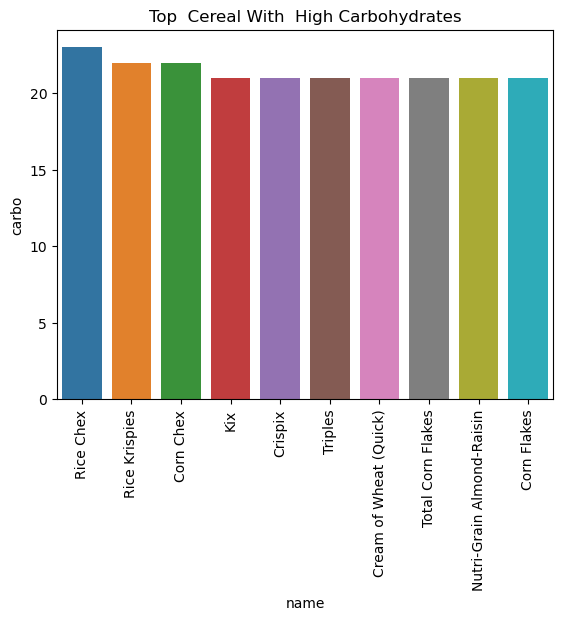

In [144]:
data1 = df.sort_values("carbo", ascending=False)
data2 = data1.head(10)
# Plotting
sns.barplot(data=data2, x='name', y='carbo')
plt.title('Top  Cereal With  High Carbohydrates')
plt.xticks(rotation=90)
plt.show()#Here outliers are true values

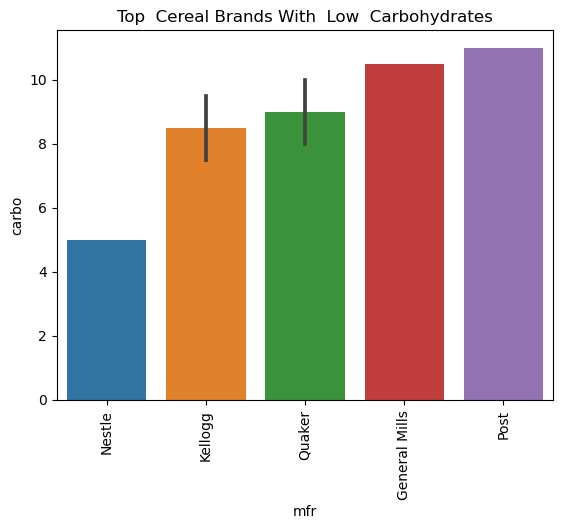

In [145]:
data1 = df.sort_values("carbo", ascending=True)
data2 = data1.head(10)
# Plotting
sns.barplot(data=data2, x='mfr', y='carbo')
plt.title('Top  Cereal Brands With  Low  Carbohydrates')
plt.xticks(rotation=90)
plt.show()#Here outliers are true values

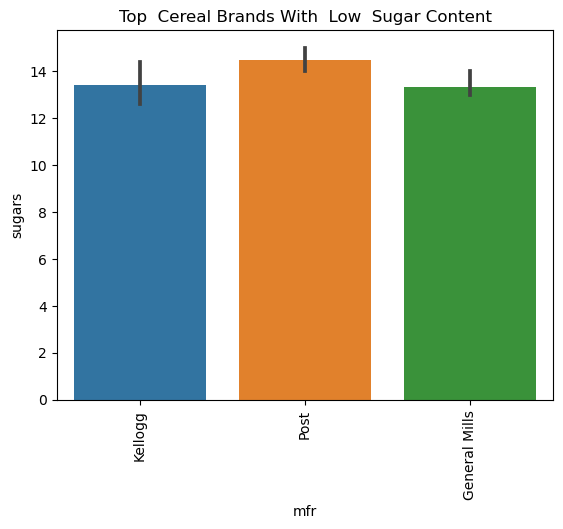

In [149]:
data1 = df.sort_values("sugars", ascending=False)
data2 = data1.head(10)
# Plotting
sns.barplot(data=data2, x='mfr', y='sugars')
plt.title('Top  Cereal Brands With  High  Sugar Content')
plt.xticks(rotation=90)
plt.show()#Here outliers are true values

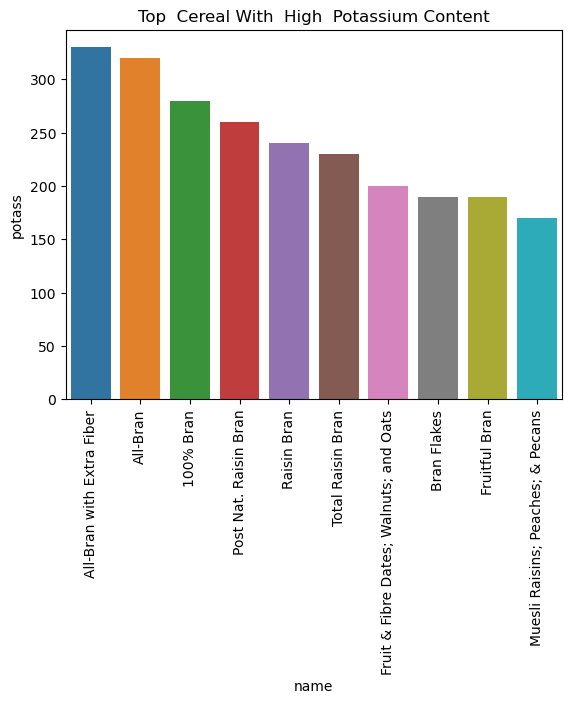

In [156]:
data1 = df.sort_values("potass", ascending=False)
data2 = data1.head(10)
# Plotting
sns.barplot(data=data2, x='name', y='potass')
plt.title('Top  Cereal With  High  Potassium Content')
plt.xticks(rotation=90)
plt.show()

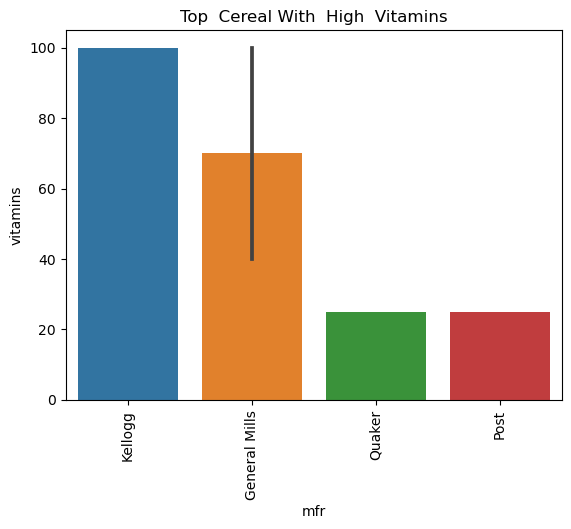

In [160]:
data1 = df.sort_values("vitamins", ascending=False)
data2 = data1.head(10)
# Plotting
sns.barplot(data=data2, x='mfr', y='vitamins')
plt.title('Top  Cereal With  High  Vitamins')
plt.xticks(rotation=90)
plt.show()

In [102]:
df.dtypes

name         object
mfr          object
type         object
calories      int32
protein     float64
fat           int64
sodium      float64
fiber       float64
carbo       float64
sugars        int64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

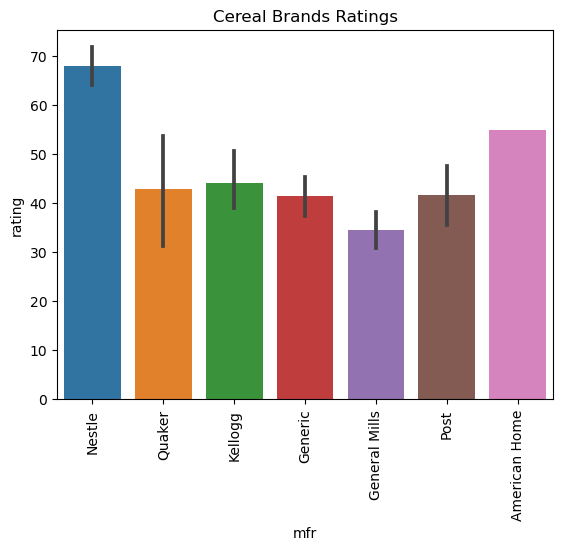

In [163]:
sns.barplot(data=df, x='mfr', y='rating')
plt.title('Cereal Brands Ratings')
plt.xticks(rotation=90)
plt.show()#Here outliers are true values

In [165]:
#Numerical VS Numerical Analysis
df[['calories','rating']].corr()

,calories,rating
calories,1.000000,-0.550463
rating,-0.550463,1.000000


conclusion: cereals with higher calorie content  have lower ratings

In [166]:
df[['protein','rating']].corr()

,protein,rating
protein,1.000000,0.473724
rating,0.473724,1.000000


conclusion: a moderate positive linear relationship is there between 'protein' and 'rating' 

In [167]:
df[['fat','rating']].corr()

,fat,rating
fat,1.000000,-0.409284
rating,-0.409284,1.000000


Conclusion: The correlation matrix indicates a moderate negative linear relationship between 'fat' and 'rating'..The correlation coefficient between 'fat' and 'rating' is approximately -0.41. This negative correlation suggests that as the fat content in cereals increases, their ratings tend to decrease

In [168]:
df[['sodium','rating']].corr()

,sodium,rating
sodium,1.000000,-0.069873
rating,-0.069873,1.000000


The correlation matrix shows a very weak negative linear relationship between 'sodium' and 'rating' (correlation coefficient = -0.069873). This suggests that there's a minimal tendency for cereals with higher sodium content to have slightly lower ratings, and vice versa. However, the correlation is quite weak, so the relationship between sodium and ratings may not be substantial or significant

In [169]:
df[['fiber','rating']].corr()

,fiber,rating
fiber,1.000000,0.312334
rating,0.312334,1.000000


The correlation matrix shows a moderate positive linear relationship between 'fiber' and 'rating' (correlation coefficient = 0.312334). Cereals with higher fiber content tend to have higher ratings, and cereals with lower fiber content tend to have lower ratings.

In [170]:
df[['carbo','rating']].corr()

,carbo,rating
carbo,1.000000,0.087913
rating,0.087913,1.000000


The correlation matrix indicates a very weak positive linear relationship between 'carbo' (carbohydrates) and 'rating' (correlation coefficient = 0.087913). Cereals with higher carbohydrate content do show a slight tendency to have higher ratings

In [171]:
df[['sugars','rating']].corr()

,sugars,rating
sugars,1.000000,-0.759675
rating,-0.759675,1.000000


The correlation matrix indicates a strong negative linear relationship between 'sugars' and 'rating' (correlation coefficient = -0.759675). In simpler terms, cereals with higher sugar content tend to have lower ratings, and cereals with lower sugar content tend to have higher ratings.

In [172]:
df[['vitamins','rating']].corr()

,vitamins,rating
vitamins,1.000000,-0.240544
rating,-0.240544,1.000000


The correlation matrix indicates a moderate negative linear relationship between 'vitamins' and 'rating' (correlation coefficient = -0.240544).Cereals with higher vitamin content tend to have slightly lower ratings, and cereals with lower vitamin content tend to have slightly higher ratings.

# 3. Multi Variate Analysis

C:\Users\Salma\AppData\Local\Temp\ipykernel_47828\1932088821.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot  =True)


<Axes: >

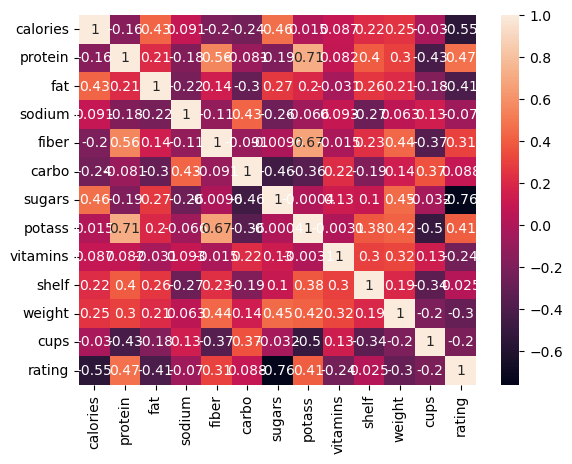

In [173]:
sns.heatmap(df.corr(),annot  =True)

In [175]:
#sns.pairplot(data = df)

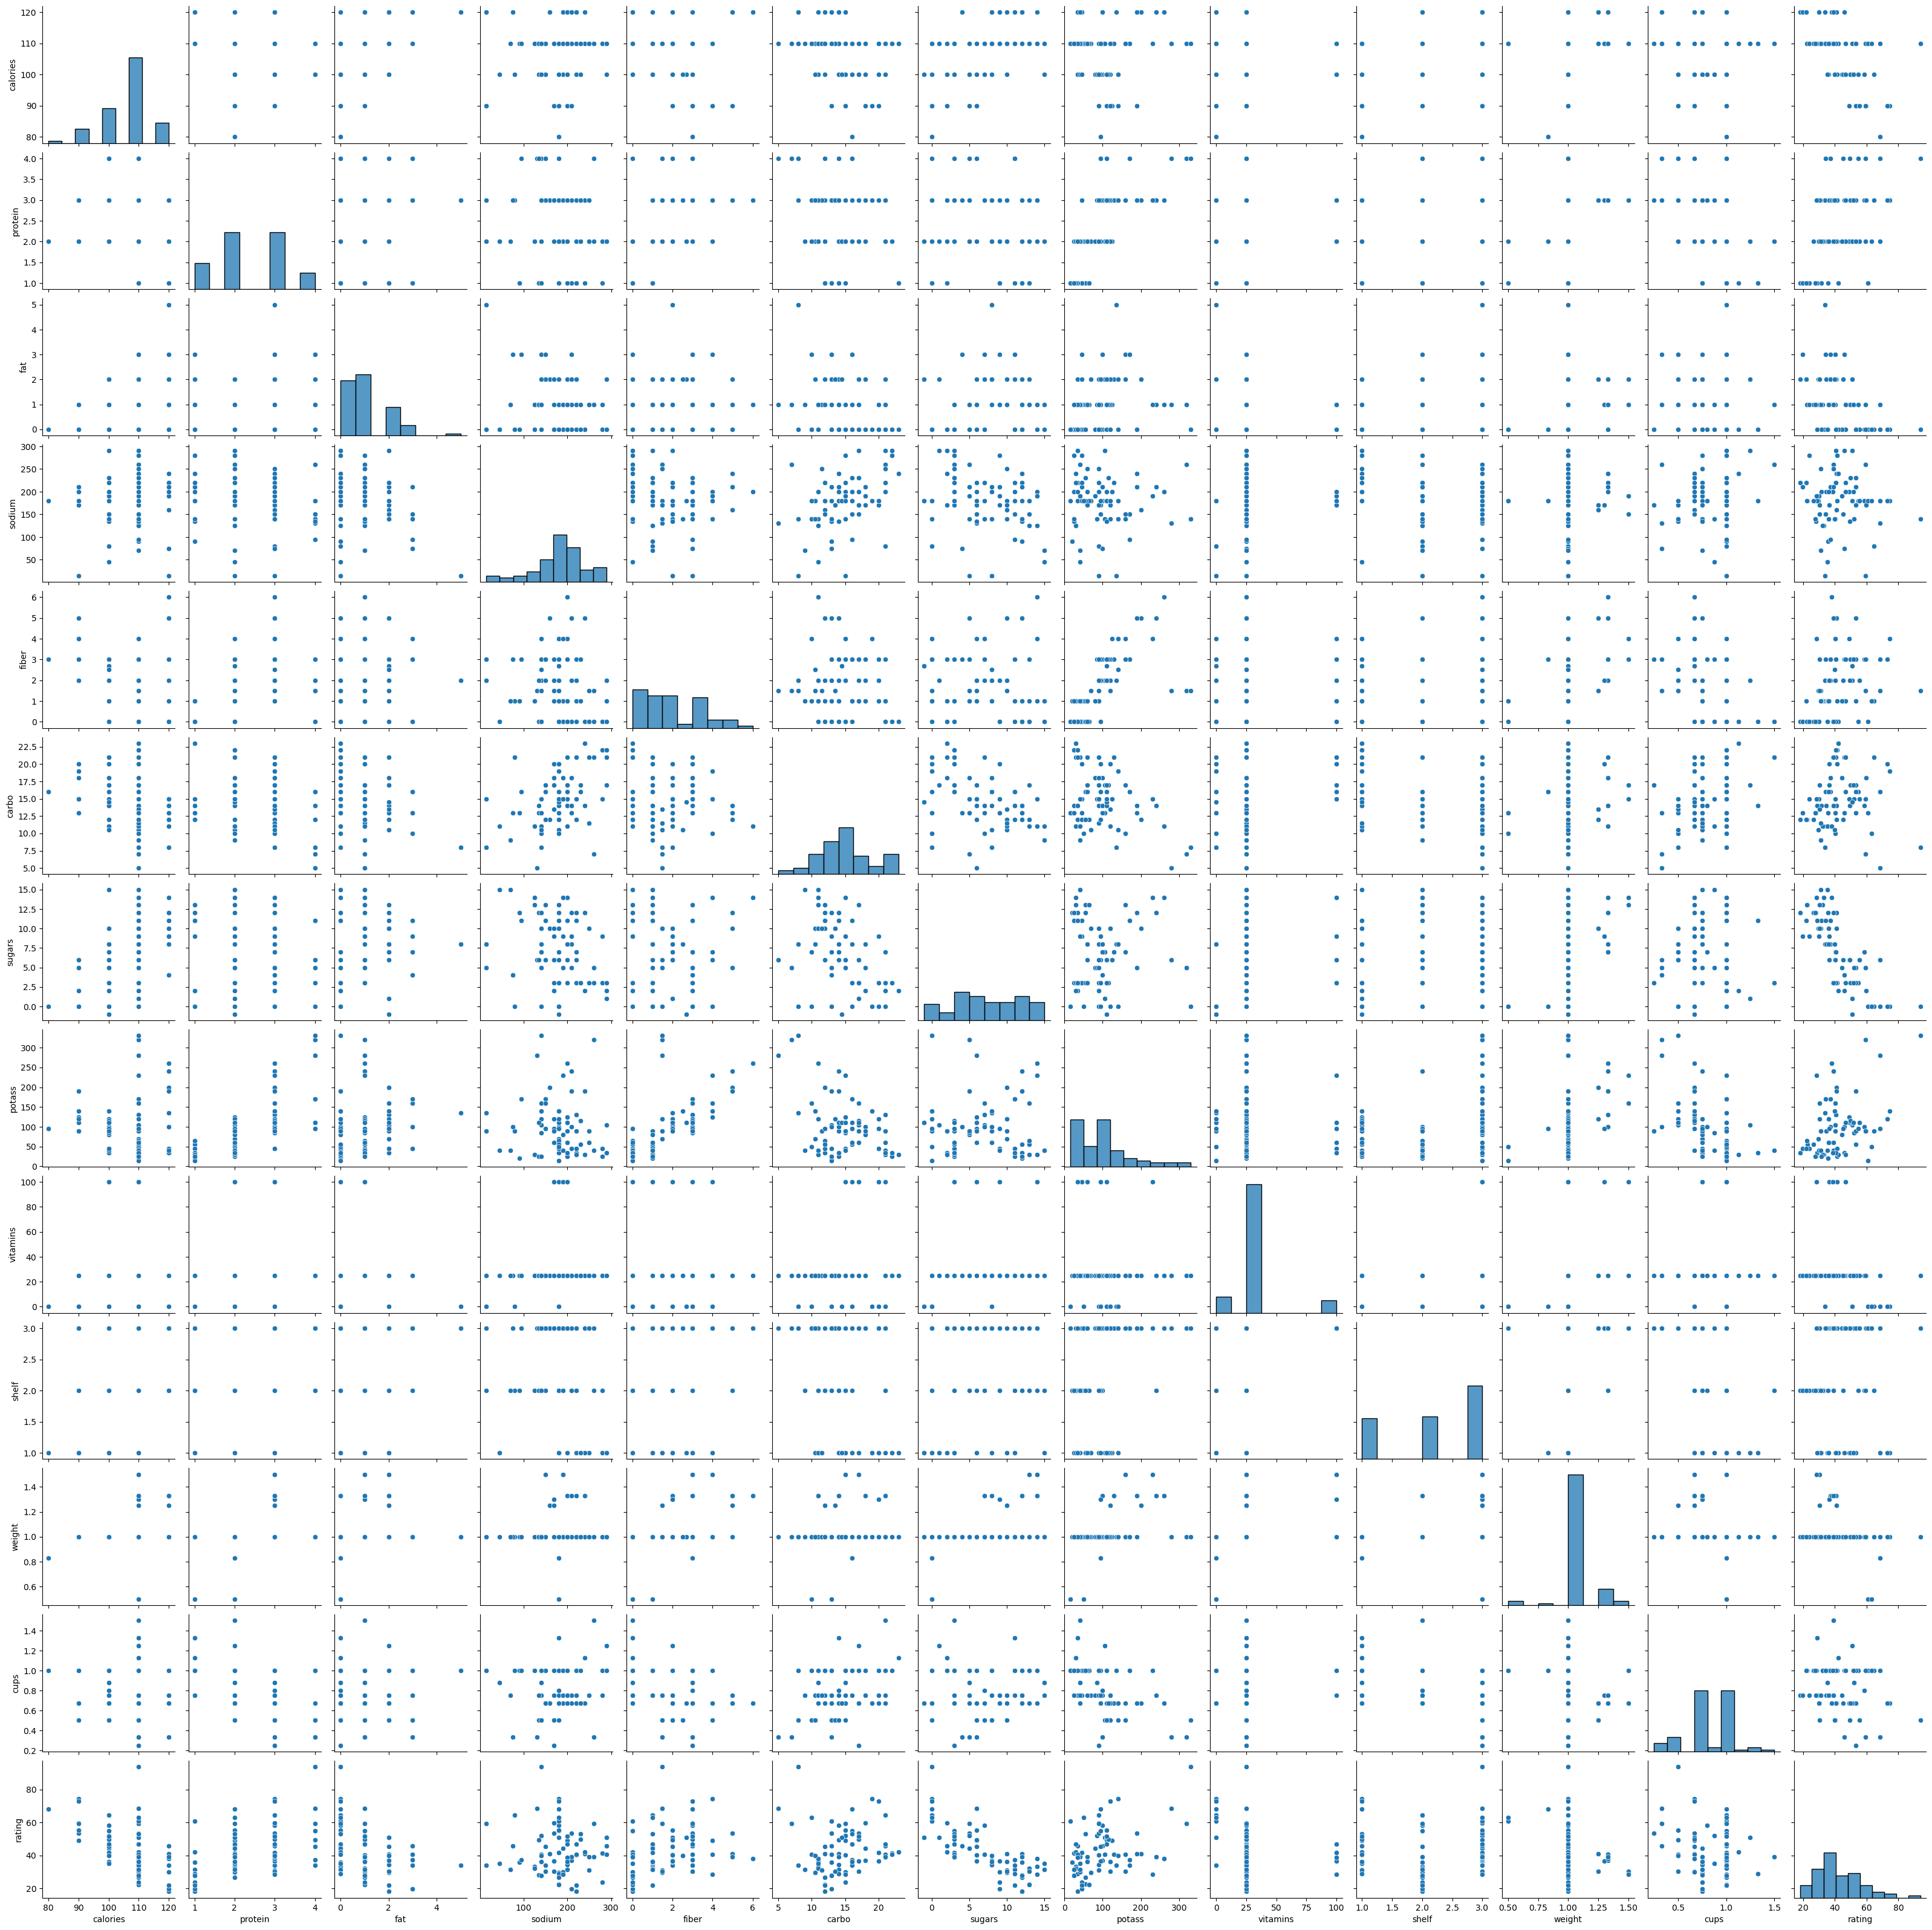

In [176]:
sns.pairplot(data = df)

Conclusion:In this Data set there are outliers but those outliers are true outliers 

Nestle has highest ratings among all brands